In [1]:
base_path = '/Users/rudra/Tech/coursera_ml_specialization/advanced_learning_algorithms/week1_course_materials/home/jovyan/work/'

In [2]:
import sys
sys.path.insert(0, base_path)

In [3]:
!pwd

/Users/rudra/Tech/coursera_ml_specialization/advanced_learning_algorithms/Practice_reimplementation_of_labs


In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use(f"{base_path}/deeplearning.mplstyle")

import logging
logging.getLogger("Tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Data

In [24]:
data_path = '/Users/rudra/Tech/coursera_ml_specialization/advanced_learning_algorithms/week1_lab_assignment/home/jovyan/work/data/'
X = np.load(f"{data_path}/X.npy")
Y = np.load(f"{data_path}/y.npy")
X = X[:1000]
Y = Y[:1000]

X.shape, Y.shape

((1000, 400), (1000, 1))

# Tensorflow Model

In [29]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-09-14 11:05:20.243329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-14 11:05:20.243625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(X, Y, epochs=20)

Epoch 1/20


2022-09-14 11:06:50.973889: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-14 11:06:51.204300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 3s 16ms/step - loss: 0.3842
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0691
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0116
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 11/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 12/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 13/20
32/32 [==============================] - 0s 5ms

In [36]:
model.predict(X[0].reshape(1,400)) #Predicting 0

array([[0.00067982]], dtype=float32)

In [37]:
model.predict(X[500].reshape(1,400)) #Predicting 1

array([[0.9979225]], dtype=float32)

Getting weights and biases

In [41]:
W1, b1 = model.layers[0].get_weights()
W1.shape, b1.shape

((400, 25), (25,))

In [42]:
W2, b2 = model.layers[1].get_weights()
W2.shape, b2.shape

((25, 15), (15,))

In [43]:
W3, b3 = model.layers[2].get_weights()
W3.shape, b3.shape

((15, 1), (1,))

Predicting 0 or 1 based on the probability given by model

In [38]:
def get_y_pred(prediction):
    if prediction >= 0.5:
        y_hat = 1
    else:
        y_hat = 0
    
    return y_hat

# Numpy implementation of a neural network

In [26]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

In [51]:
def Dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        z = np.dot(W[:, i], a_in) + b[i]
        a_out[i] = g(z)
    return a_out

In [52]:
def Sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = Dense(x, W1, b1, sigmoid)
    a2 = Dense(a1, W2, b2, sigmoid)
    a3 = Dense(a2, W3, b3, sigmoid)
    return a3

In [54]:
pred = Sequential(X[0], W1, b1, W2, b2, W3, b3)
print(pred)

get_y_pred(pred)

[0.00067982]


0

# Vectorized Numpy implementation of a neural network

In [39]:
def Dense_V(A_in, W, b, g):
    z = np.matmul(A_in, W) + b
    A_out = g(z)
    return A_out

In [40]:
def Sequential_V(X, W1, b1, W2, b2, W3, b3):
    a1 = Dense_V(X, W1, b1, sigmoid)
    a2 = Dense_V(a1, W2, b2, sigmoid)
    a3 = Dense_V(a2, W3, b3, sigmoid)
    return a3

In [55]:
pred = Sequential_V(X[0], W1, b1, W2, b2, W3, b3)
print(pred)

get_y_pred(pred)

[0.00067982]


0

# Plotting predictions of every model along with actual label

In [76]:
import warnings

def plot_pred():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    m, n = X.shape
    fig, axes = plt.subplots(8, 8, figsize=(8,8))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

    for i, ax in enumerate(axes.flat):
        random_idx = np.random.randint(m) #selecting random indices
        #Selecting rows corresponding to random indices and reshaping them
        X_random_reshaped = X[random_idx].reshape((20,20)).T

        #Display image
        ax.imshow(X_random_reshaped, cmap='gray')

        #Precict using numpy implementation
        np_pred = Sequential(X[random_idx], W1, b1, W2, b2, W3, b3)
        np_yhat = int(np_pred >= 0.5)

        #Precict using Vectorized numpy implementation
        np_v_pred = Sequential_V(X[random_idx], W1, b1, W2, b2, W3, b3)
        np_v_yhat = int(np_v_pred >= 0.5)

        #Predict using TF model
        tf_pred = model.predict(X[random_idx].reshape(1,400))
        tf_yhat = int(tf_pred >= 0.5)

        ax.set_title(f"{Y[random_idx, 0]}, {tf_yhat}, {np_v_yhat}, {np_yhat}", fontsize=12)
        ax.set_axis_off()
    
    fig.suptitle("Actual Label, Tensorflow Prediction, Vectorized Numpy Prediction, Numpy Prediction", fontsize=16)
    plt.show()


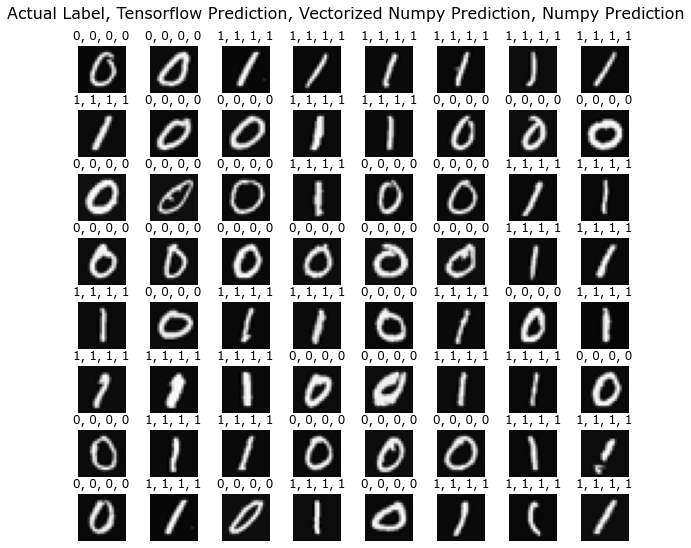

In [77]:
plot_pred()